# Notebook to generate the PSTH colorscheme image.

This notebook saves the colorscheme image to `./colorscheme.pdf`.

In [1]:
"""Imports."""

from matplotlib import pyplot as plt
import numpy as np

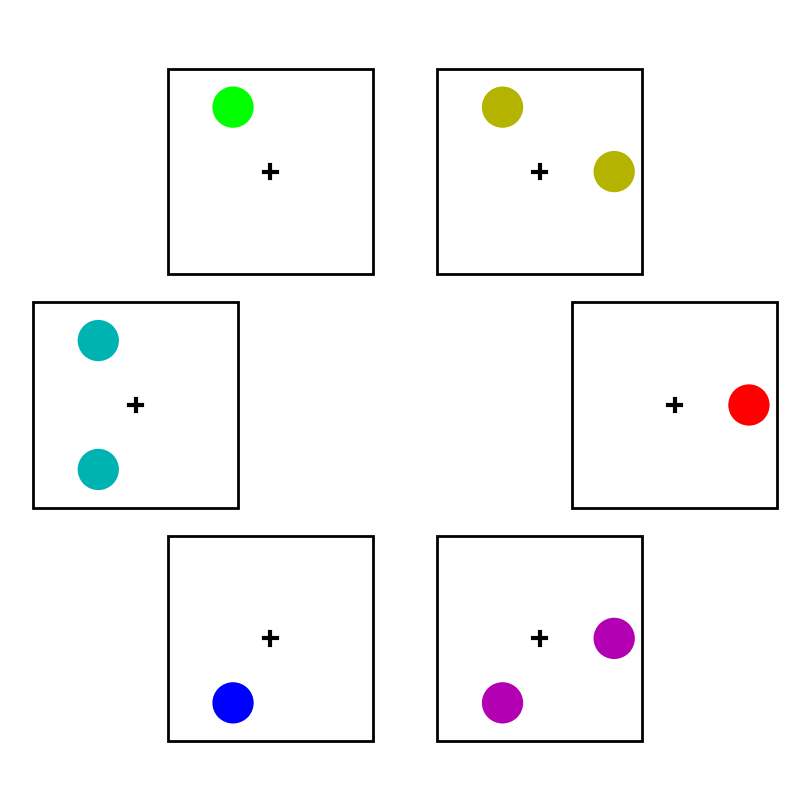

In [2]:
_PALETTE = {
    (0,): (1, 0, 0),
    (1,): (0, 1, 0),
    (2,): (0, 0, 1),
    (0, 1): (0.7, 0.7, 0),
    (0, 2): (0.7, 0, 0.7),
    (1, 2): (0, 0.7, 0.7),
}

fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=200)
ax.set_aspect('equal')
ax.axis('off')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

big_radius = 2.1
little_radius = 0.58
little_sidelength = 1.6
circle_radius = 0.15

# Draw boxes
for i in range(6):
    theta_big = i * 2 * np.pi / 6
    x_big = big_radius * np.cos(theta_big)
    y_big = big_radius * np.sin(theta_big)
    
    # Make box centered at (x_big, y_big)
    box = plt.Rectangle((x_big - little_sidelength / 2, y_big - little_sidelength / 2), little_sidelength, little_sidelength, color='k', fill=False)
    ax.add_artist(box)
    
    # Make fixation cross
    cross = plt.Line2D([x_big - 0.05, x_big + 0.05], [y_big, y_big], color='k')
    ax.add_artist(cross)
    cross = plt.Line2D([x_big, x_big], [y_big - 0.05, y_big + 0.05], color='k')
    ax.add_artist(cross)

# Draw 1-object circles
for i in range(3):
    theta = i * 2 * np.pi / 3
    x = (little_radius + big_radius) * np.cos(theta)
    y = (little_radius + big_radius) * np.sin(theta)
    circle = plt.Circle((x, y), circle_radius, color=_PALETTE[(i,)], fill=True)
    ax.add_artist(circle)
    
# Draw 2-object circles
for i in range(3):
    locations = [x for x in range(3) if x != i]
    color = _PALETTE[tuple(locations)]
    if i == 0:
        theta_big = np.pi
    elif i == 1:
        theta_big = 5 * np.pi / 3
    else:
        theta_big = np.pi / 3
    x_big = big_radius * np.cos(theta_big)
    y_big = big_radius * np.sin(theta_big)
    for loc in locations:
        theta_small = loc * 2 * np.pi / 3
        x = x_big + little_radius * np.cos(theta_small)
        y = y_big + little_radius * np.sin(theta_small)
        circle = plt.Circle((x, y), circle_radius, color=color, fill=True)
        ax.add_artist(circle)
    
fig.savefig('colorscheme.pdf', bbox_inches='tight')